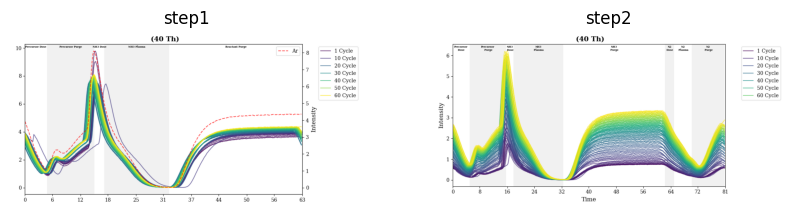

In [278]:
# reference plot from J. Kim
import matplotlib.pyplot as plt
import matplotlib.image as img
fig, axs = plt.subplots(1,2, figsize=(10,8))
axs[0].imshow(img.imread('image/(40 Th)_step1.png'))
axs[0].set_title('step1')
axs[0].axis('off')
axs[1].imshow(img.imread('image/(40 Th)_step2.png'))
axs[1].set_title('step2')
axs[1].axis('off')
plt.show()

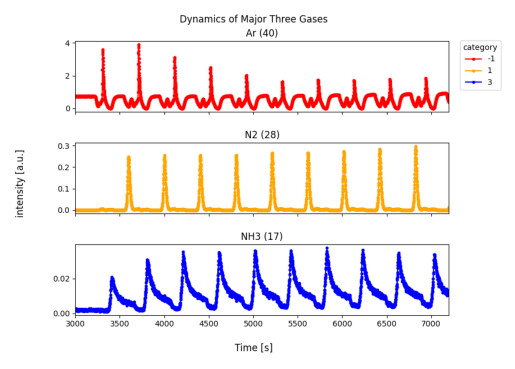

In [279]:
plt.imshow(img.imread('image/Dynamics of Major Three Gases.png'))
plt.axis('off')
plt.show()

In [280]:
# concatenate datasets
import os
#Open the H5 file in read mode
path = 'data/text_file/'
file = os.listdir(path)
file

['2024.07.29.09h46m45s_process.h5.txt',
 '2024.07.29.10h10m45s_process.h5.txt',
 '2024.07.29.10h34m45s_process.h5.txt',
 '2024.07.29.10h58m45s_process.h5.txt',
 '2024.07.29.11h22m45s_process.h5.txt',
 '2024.07.29.11h46m45s_process.h5.txt']

In [281]:
import pandas as pd
dfs = []
for f in file:
    dfs.append(pd.read_csv(path+f, sep='\t', encoding_errors='ignore'))
    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(37994, 402)


,time,(2 Th),(3 Th),(4 Th),(5 Th),(6 Th),(7 Th),(8 Th),(9 Th),(10 Th),...,RG monitor [V],RG current limit flag,RB target [V],RB monitor [V],RB current limit flag,5CHV Board A temp monitor [C],update time [s],total SDO read errors,failed HTTP GET count,Unnamed: 401
0,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.219,0,700,700.75,0,31.12,0.125,0,0,NaN
1,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
2,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
3,2024-07-29 09:46:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
4,2024-07-29 09:46:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN


In [282]:
pressure1 = df.loc[:,'PRESSFLOAT1 monitor [mbar]']
pressure2 = df.loc[:,'PRESSFLOAT2 monitor [mbar]']
pressure3 = df.loc[:,'PRESSFLOAT3 monitor [mbar]']
pressure4 = df.loc[:,'PRESSFLOAT4 monitor [mbar]']

print('pressure 1 :', pressure1.min(), pressure1.max())
print('pressure 2 :', pressure2.min(), pressure2.max())
print('pressure 3 :', pressure3.min(), pressure3.max())
print('pressure 4 :', pressure4.min(), pressure4.max())

pressure 1 : 1.39308 1.74573
pressure 2 : 3.81157e-08 1.27299e-06
pressure 3 : 2.2269e-07 2.52257e-07
pressure 4 : 1000 1000


In [283]:
[range(len(pressure2))]

[range(0, 37994)]

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pressure2, '.-')

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(pressure1, '.-')
axs[0].set_title('pressure 1')
axs[1].plot(pressure2, '.-')
axs[1].set_title('pressure 2')
plt.show()

In [286]:
# preprocessing as done in p1
df = df.iloc[:,:315]

df['time'] = df['time'].apply(lambda x : x.split(' ')[1]) # index is set to time [s]
df = df.groupby('time')[df.columns[1:]].mean().reset_index()
df = df.drop(columns=['time'])

df.index.name = 'time'
df.columns = range(2, 316) # (2 Th) -> 2
df.head()

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
# category
df_max = pd.read_csv('tof_max_category.csv', index_col='Unnamed: 0')

category_mass = [[40]] # Ar shows the highest value
for i in range(1,10):
    category_mass.append(list(df_max[df_max['category']==i].index))
print(category_mass[:4])

category_df = []
for i in category_mass[:4]:
    temp = []
    for j in i:
        temp.append((df.loc[:,j]).to_frame())
    if len(temp) >1: # concat
        category_df.append(pd.concat(temp, axis=1))
    else:
        category_df.append((df.loc[:,i]))
print(len(category_df))

[[40], [28], [63, 85, 98], [16, 17, 20, 30, 36, 65, 100, 133, 135]]
4


In [483]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

# scaling on each category
category_df_scaled = []
for df_elem in category_df:
    mm = MinMaxScaler()
    df_elem_scaled = mm.fit_transform(df_elem.to_numpy())
    df_elem_scaled = pd.DataFrame(df_elem_scaled, columns=df_elem.columns)
    category_df_scaled.append(df_elem_scaled)

category_df_scaled[0]

,40
0,0.000003
1,0.000004
2,0.000002
3,0.000006
4,0.000001
...,...
7595,0.535784
7596,0.536809
7597,0.535861
7598,0.535518


In [490]:
# concate the scaled dfs
pd.concat(category_df_scaled, axis=1).iloc[:,1]

0       0.000197
1       0.000234
2       0.000179
3       0.000209
4       0.000346
          ...   
7595    0.000666
7596    0.000829
7597    0.000826
7598    0.000753
7599    0.000730
Name: 28, Length: 7600, dtype: float64

In [470]:
category_df_scaled[0].idxmax().values

array([7033])

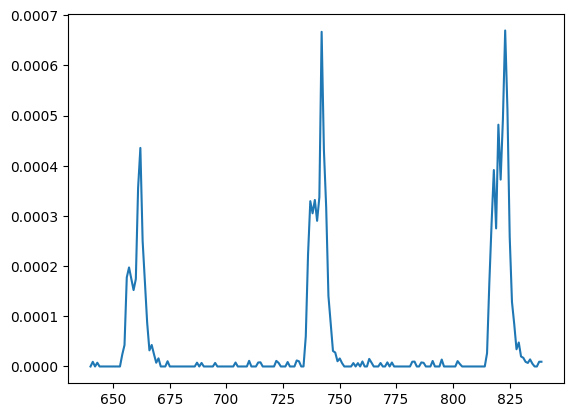

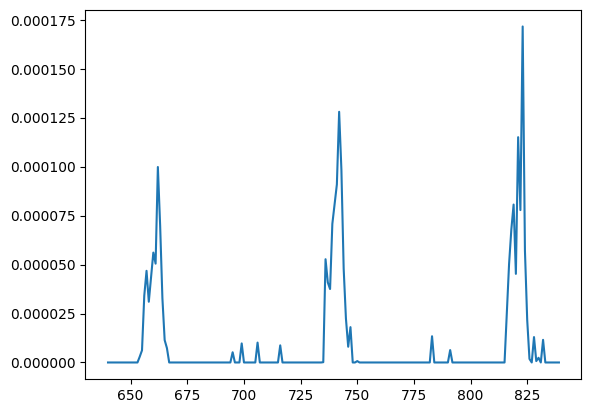

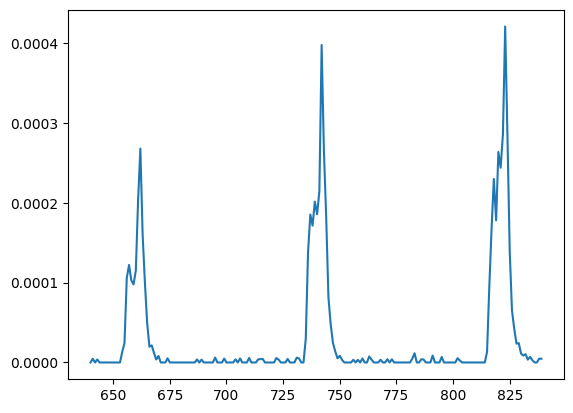

In [377]:
# HCDS
plt.plot(df.loc[:,268][640:840])
plt.show()
plt.plot(df.loc[:,269][640:840])
plt.show()
plt.plot((df.loc[:,268][640:840] + df.loc[:,269][640:840])/2)
plt.show()

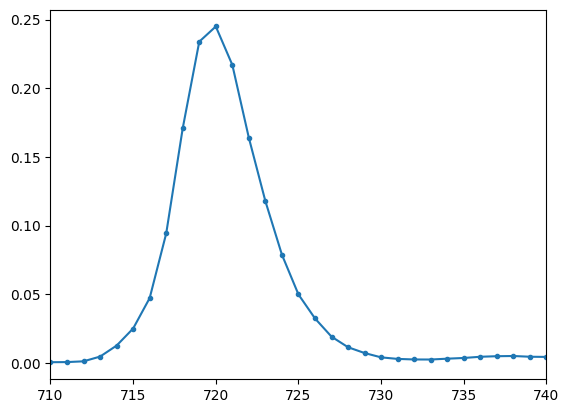

In [397]:
plt.plot(df.loc[:,28][640:741],'.-')
plt.xlim(710,740)
plt.show()

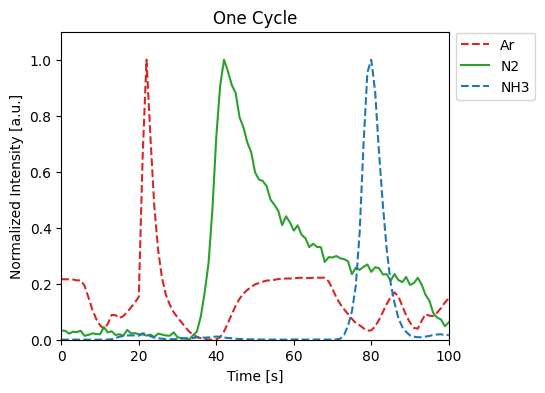

In [381]:
# MinMaxScaler to each element
mm = MinMaxScaler()
ar = mm.fit_transform(np.array(df.loc[:,40][640:741].values).reshape(-1,1))
mm = MinMaxScaler()
n2 = mm.fit_transform(np.array(df.loc[:,28][640:741].values).reshape(-1,1))
mm = MinMaxScaler()
nh3 = mm.fit_transform(np.array(df.loc[:,17][640:741].values).reshape(-1,1))

category_to_plot = [ar, nh3, n2]
colors = ['tab:red', 'tab:green', 'tab:blue']
line_style = ['--','-','--']

# plot together
plt.figure(figsize=(5,4))
for idx, val in enumerate(category_to_plot):
    plt.plot(val,line_style[idx],color=colors[idx])
    plt.xlabel('Time [s]')
    plt.xlim(0,100)
    plt.ylim(0,1.1)
    plt.ylabel('Normalized Intensity [a.u.]')
plt.legend(['Ar','N2','NH3'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.title('One Cycle')
plt.show()

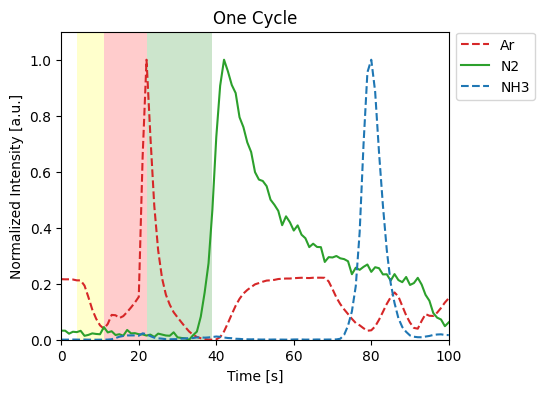

In [435]:
plt.figure(figsize=(5,4))
for idx, val in enumerate(category_to_plot):
    plt.plot(val,line_style[idx],color=colors[idx])
    plt.xlabel('Time [s]')
    plt.xlim(0,100)
    plt.ylim(0,1.1)
    plt.ylabel('Normalized Intensity [a.u.]')
plt.legend(['Ar','N2','NH3'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.title('One Cycle')

plt.axvspan(4, 11, color='yellow', alpha=0.2, lw=0) # hcds 5s
plt.axvspan(11, 11+11, color='red', alpha=0.2, lw=0) # Ar 10s
plt.axvspan(22, 22+17, color='green', alpha=0.2, lw=0) # NH3 2+15=17s
# plt.axvspan(41+2, 41+2+30, color='red', alpha=0.2, lw=0) # Ar 30s
# plt.axvspan(start+5+10+17+30, start+5+10+17+30+7, color='skyblue', alpha=0.2, lw=0) # N2 2+5=7s
# plt.axvspan(start+5+10+17+30+7, start+5+10+17+30+7+10, color='red', alpha=0.2, lw=0) # Ar 10s
plt.show()

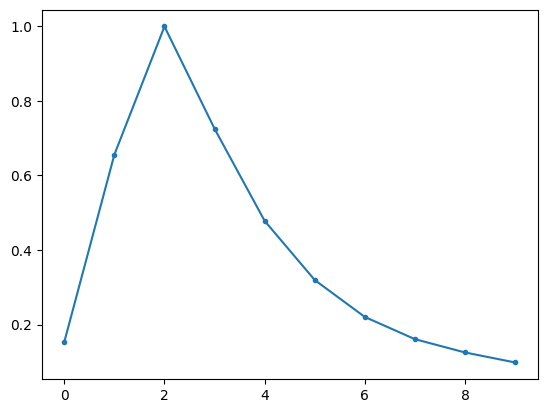

In [387]:
plt.figure(figsize=(5,4))
for idx, val in enumerate(category_to_plot):
    plt.plot(val,line_style[idx],color=colors[idx])
    plt.xlabel('Time [s]')
    plt.xlim(0,100)
    plt.ylim(0,1.1)
    plt.ylabel('Normalized Intensity [a.u.]')
plt.legend(['Ar','N2','NH3'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.title('One Cycle')
start = 7
plt.axvspan(7, start+5, color='yellow', alpha=0.2, lw=0) # hcds 5s
plt.axvspan(start+5, start+5+10, color='red', alpha=0.2, lw=0) # Ar 10s
plt.axvspan(start+5+10, start+5+10+17, color='green', alpha=0.2, lw=0) # NH3 2+15=17s
plt.axvspan(start+5+10+17, start+5+10+17+30, color='red', alpha=0.2, lw=0) # Ar 30s
plt.axvspan(start+5+10+17+30, start+5+10+17+30+7, color='skyblue', alpha=0.2, lw=0) # N2 2+5=7s
plt.axvspan(start+5+10+17+30+7, start+5+10+17+30+7+10, color='red', alpha=0.2, lw=0) # Ar 10s
plt.show()

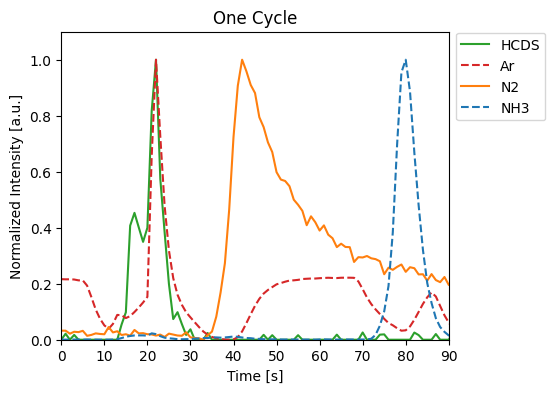

In [375]:
# MinMaxScaler to each element
mm = MinMaxScaler()
hcds = mm.fit_transform(np.array(df.loc[:,268][640:741].values).reshape(-1,1))
mm = MinMaxScaler()
ar = mm.fit_transform(np.array(df.loc[:,40][640:741].values).reshape(-1,1))
mm = MinMaxScaler()
n2 = mm.fit_transform(np.array(df.loc[:,28][640:741].values).reshape(-1,1))
mm = MinMaxScaler()
nh3 = mm.fit_transform(np.array(df.loc[:,17][640:741].values).reshape(-1,1))

category_to_plot = [hcds, ar, nh3, n2]
colors = ['tab:green','tab:red', 'tab:orange', 'tab:blue']
line_style = ['-','--','-','--']

# plot together
plt.figure(figsize=(5,4))
for idx, val in enumerate(category_to_plot):
    plt.plot(val,line_style[idx],color=colors[idx])
    plt.xlabel('Time [s]')
    plt.xlim(0,90)
    plt.ylim(0,1.1)
    plt.ylabel('Normalized Intensity [a.u.]')
plt.legend(['HCDS','Ar','N2','NH3'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.title('One Cycle')
plt.show()

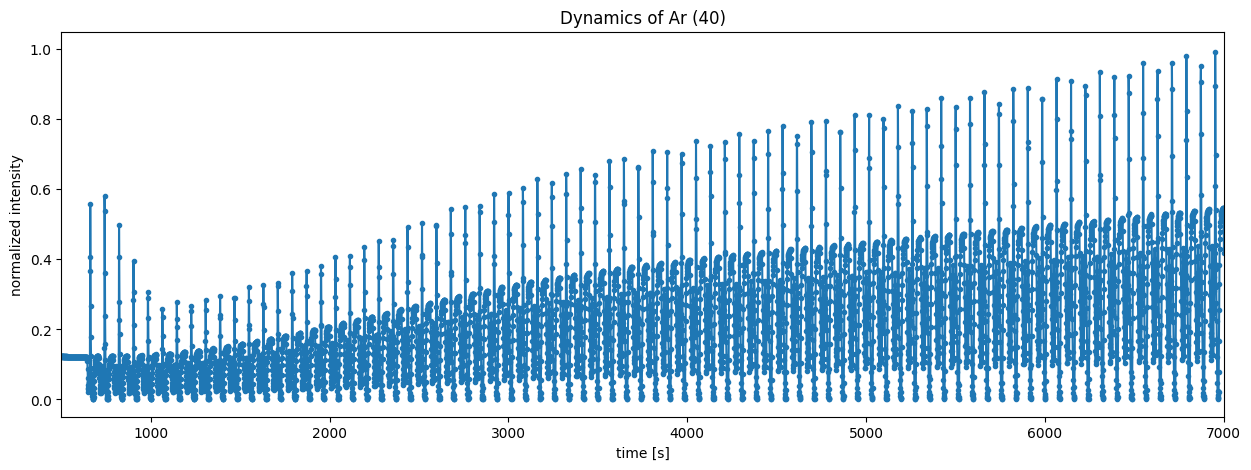

In [290]:
plt.figure(figsize=(15,5))
plt.plot(category_df_scaled[0][500:7600], '.-')
plt.xlabel('time [s]')
plt.xlim(500,7000)
plt.ylabel('normalized intensity')
plt.title('Dynamics of Ar (40)')
plt.show()

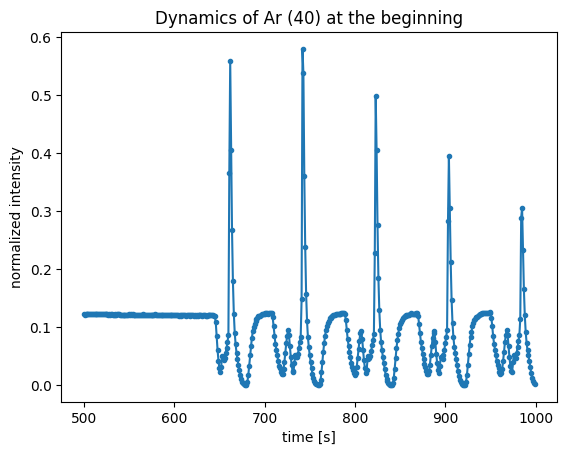

In [291]:
# plt.figure(figsize=(15,5))
plt.plot(category_df_scaled[0][500:1000], '.-')
plt.xlabel('time [s]')
plt.ylabel('normalized intensity')
plt.title('Dynamics of Ar (40) at the beginning')
plt.show()

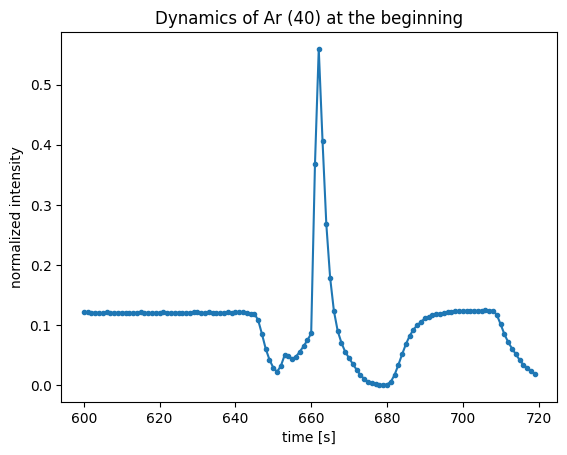

In [292]:
plt.plot(category_df_scaled[0][600:720], '.-')
plt.xlabel('time [s]')
plt.ylabel('normalized intensity')
plt.title('Dynamics of Ar (40) at the beginning')
plt.show()

In [293]:
category_df_scaled[0].iloc[660:670,:]

,40
660,0.086271
661,0.367100
662,0.559161
663,0.405864
664,0.267692
665,0.179112
666,0.123754
667,0.090480
668,0.070567
669,0.055580


In [294]:
# turn the df to list
import itertools
import numpy as np
array40 = list(itertools.chain(*category_df_scaled[0].values.tolist()))

peak_idx = 662 # index of the first peak
cycle = (len(array40) - peak_idx) // 80
interval_40 = []
for i in range(cycle): # how many cycles recorded?
    interval_40.append(array40[peak_idx-39:peak_idx+41]) # split the interval into pieces roughly; this will be used to find a local maximum
    peak_idx += 80 # considering the total cycle
print(len(interval_40), len(interval_40[0]))

86 80


In [295]:
# find a local maximum 
max_40 = []
for i in interval_40:
    max_40.append(np.max(i))
max_40[:5]

[np.float64(0.5591611739333755),
 np.float64(0.5802633684797905),
 np.float64(0.4988269996287272),
 np.float64(0.3955240741501964),
 np.float64(0.30612106817147605)]

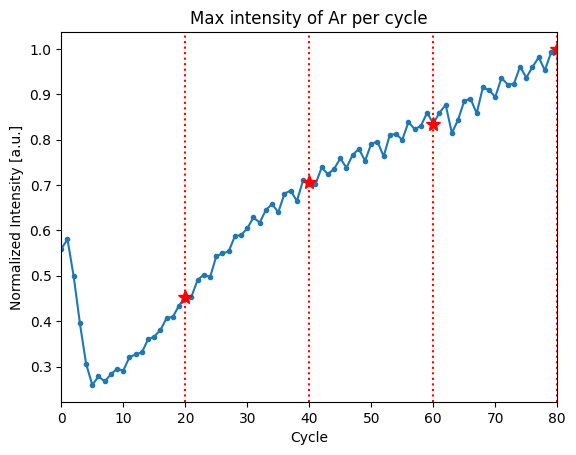

In [455]:
plt.plot(max_40,'.-')
x = np.arange(20,81,20)
plt.plot(x, [max_40[i] for i in x], '*',color='red',markersize=10)
for i in x:
    plt.axvline(x = i, color = 'red', linestyle=':', label = 'axvline - full height')
plt.xlabel('Cycle')
plt.xlim(0,80)
plt.ylabel('Normalized Intensity [a.u.]')
plt.title('Max intensity of Ar per cycle')
plt.show()

In [297]:
# max values to indices
max_40_idx = []
cursor = 0
for idx, val in enumerate(array40):
    if val == max_40[cursor]:
        max_40_idx.append(idx)
        cursor += 1
    if cursor == len(max_40):
        break
max_40_idx[:5]

[662, 742, 823, 904, 985]

In [298]:
# new interval w.r.t the max values
interval_40 = []
cursor = 0
for i in range(cycle):
    start = max_40_idx[cursor]-39
    end = max_40_idx[cursor]+41
    interval_40.append(array40[start:end])
    cursor += 1

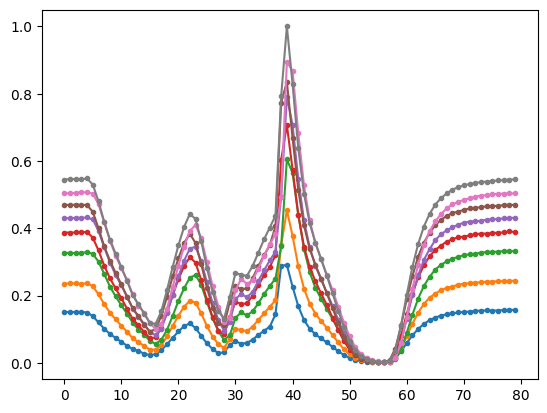

In [299]:
for i in range(8): # plot the cycles 10, 20, ..., 80
    plt.plot(interval_40[10*(i+1)],'.-')
plt.show()

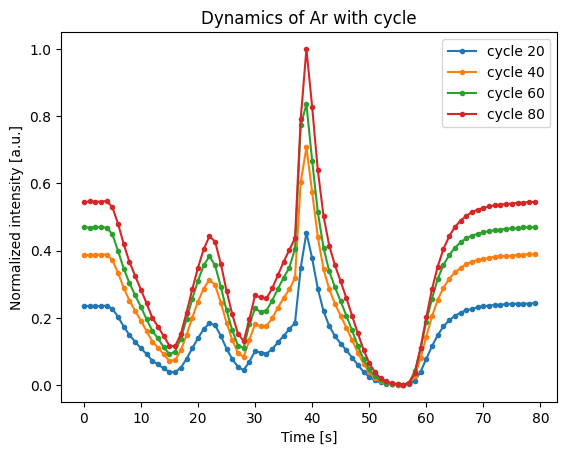

In [300]:
for i in range(4): # plot the cycles 20, 40, ...
    plt.plot(interval_40[20*(i+1)],'.-')
plt.legend(['cycle '+str(20*(i+1)) for i in range(4)])
plt.xlabel('Time [s]')
plt.ylabel('Normalized intensity [a.u.]')
plt.title('Dynamics of Ar with cycle')
plt.show()

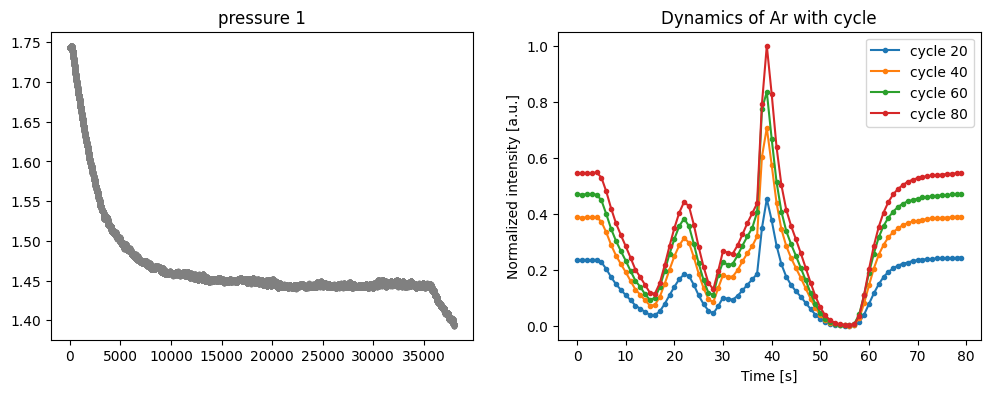

In [302]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(pressure1, '.-',color='gray')
axs[0].set_title('pressure 1')

for i in range(4): # plot the cycles 20, 40, ...
    axs[1].plot(interval_40[20*(i+1)],'.-')
axs[1].legend(['cycle '+str(20*(i+1)) for i in range(4)])
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Normalized intensity [a.u.]')
axs[1].set_title('Dynamics of Ar with cycle')
plt.show()

Do the same to other molecules

In [458]:
# do the same to all detected molecules up to the 3rd category
import itertools
list(itertools.chain(*category_df))

[40, 28, 63, 85, 98, 16, 17, 20, 30, 36, 65, 100, 133, 135]

In [493]:
df_scaled_combined = pd.concat(category_df_scaled, axis=1)
df_scaled_combined.iloc[:,0].idxmax()

7033

In [514]:
df_scaled_combined.columns[13]

np.int64(135)

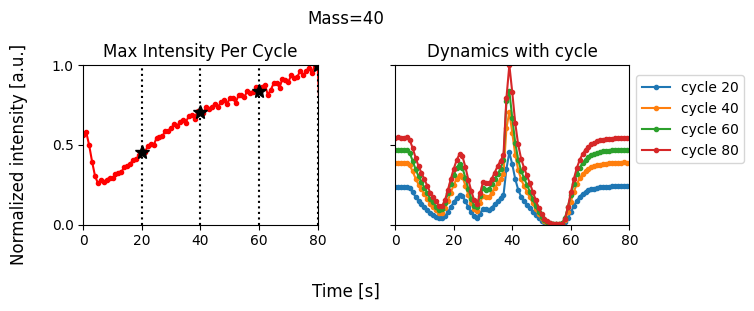

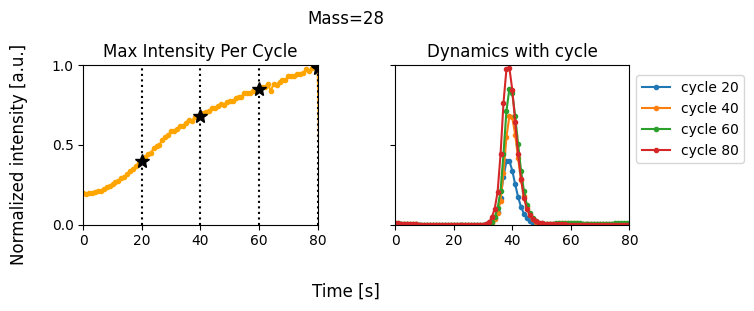

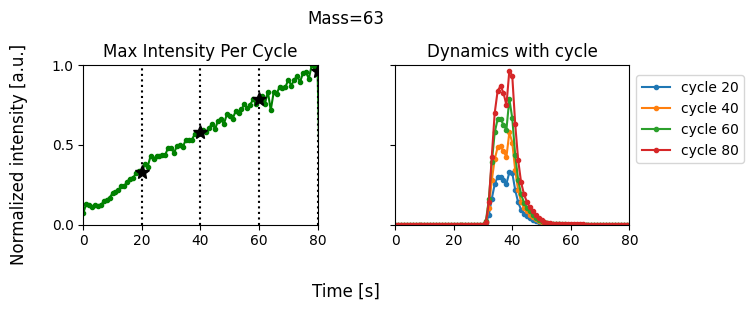

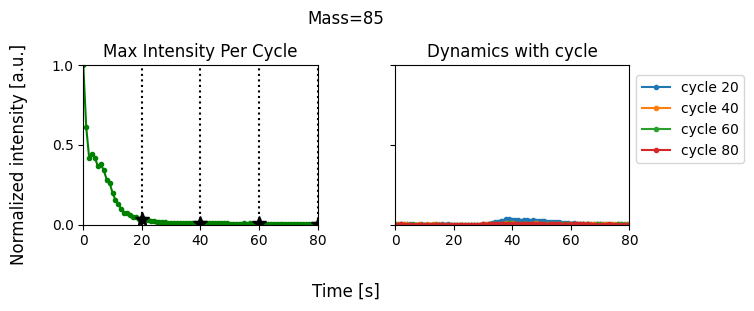

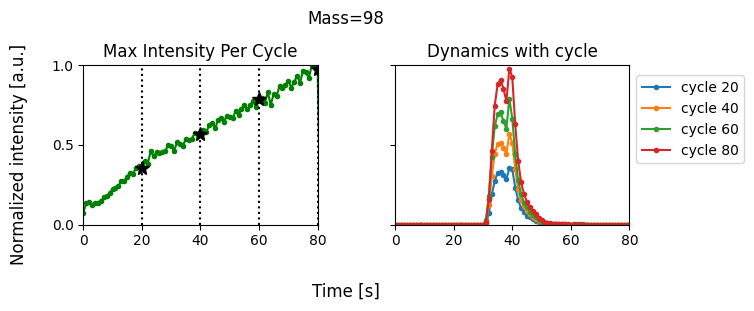

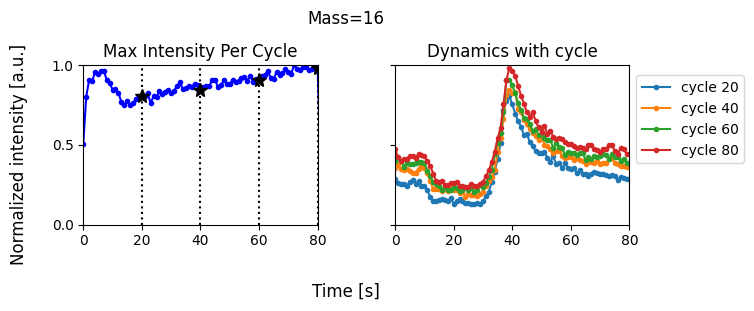

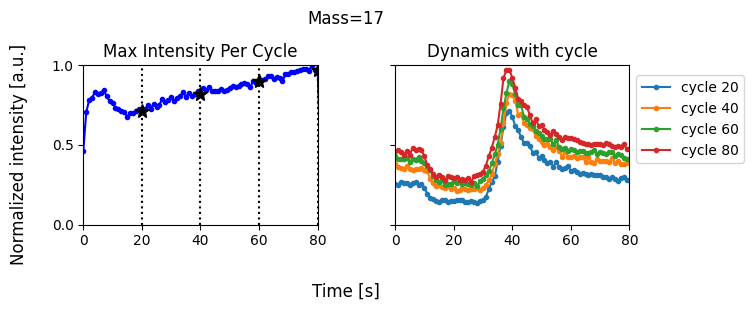

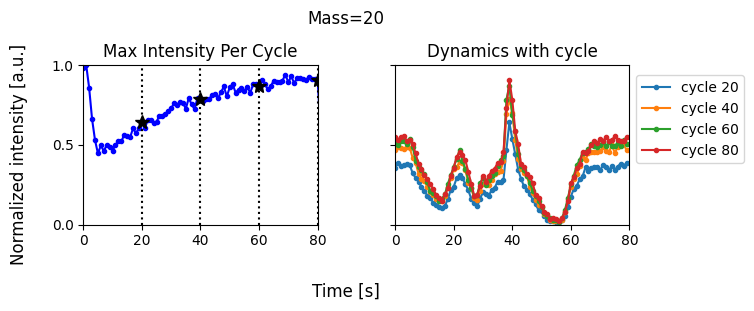

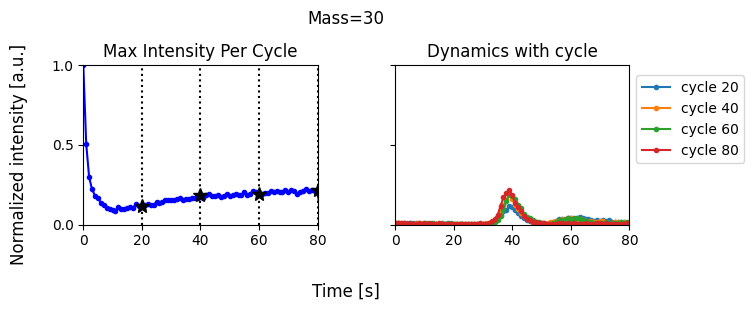

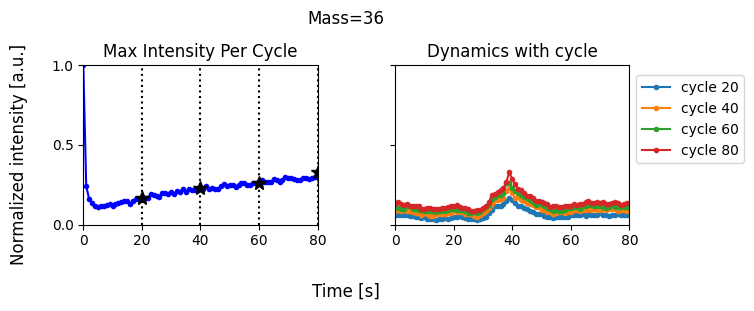

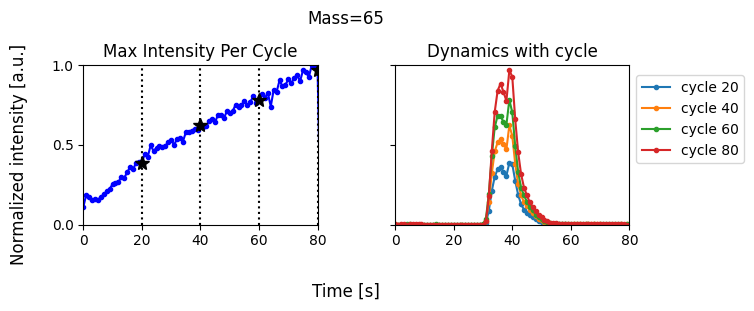

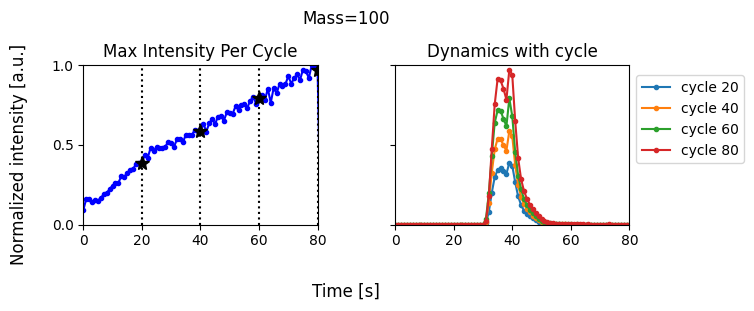

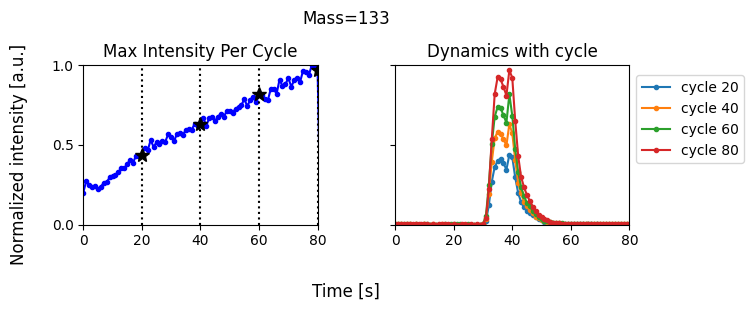

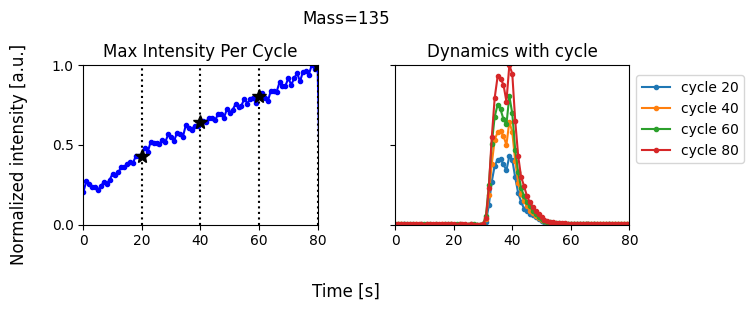

In [563]:
df_scaled_combined = pd.concat(category_df_scaled, axis=1)
cate_colors = ['red']*1 + ['orange']*1 + ['green']*3 + ['blue']*9

for i in range(len(df_scaled_combined.columns)):
    flag = i
    array_temp = df_scaled_combined.iloc[:,i].values

    # find the first peak
    peak_idx = df_scaled_combined.iloc[:,i][600:735].idxmax() # index of the first peak
    cycle = (len(array_temp) - peak_idx) // 80
    interval_temp = []
    for i in range(cycle): # how many cycles recorded?
        interval_temp.append(array_temp[peak_idx-39:peak_idx+41]) # split the interval into pieces roughly; this will be used to find a local maximum
        peak_idx += 80 # considering the total cycle

    # find a local maximum 
    max_temp = []
    for j in interval_temp:
        max_temp.append(np.max(j))
    
    # draw plot
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(7,3))
    fig.tight_layout(pad=4)
    axs[0].plot(max_temp,'.-',color=cate_colors[flag])
    x = np.arange(20,81,20)
    axs[0].plot(x, [max_temp[j] for j in x], '*',color='black',markersize=10)
    for j in x:
        axs[0].axvline(x = j, color = 'black', linestyle=':', label = 'axvline - full height')
        
    # plt.xlabel('Cycle')
    axs[0].set_xlim(0,80)
    axs[0].set_ylim(0,1)
    axs[0].set_yticks(np.arange(0,1.1,0.5))
    # plt.ylabel('Normalized Intensity [a.u.]')
    axs[0].set_title('Max Intensity Per Cycle')

    # max values to indices
    max_temp_idx = []
    cursor = 0
    for idx, val in enumerate(array_temp):
        if val == max_temp[cursor]:
            max_temp_idx.append(idx)
            cursor += 1
        if cursor == len(max_temp):
            break

    # new interval w.r.t the max values
    interval_temp = []
    cursor = 0
    for k in range(cycle):
        start = max_temp_idx[cursor]-39
        end = max_temp_idx[cursor]+41
        interval_temp.append(array_temp[start:end])
        cursor += 1

    for j in range(4): # plot the cycles 20, 40, ...
        axs[1].plot(interval_temp[20*(j+1)],'.-')
        axs[1].legend(['cycle '+str(20*(j+1)) for j in range(4)], bbox_to_anchor=(1,0.98),loc='upper left')
        # plt.xlabel('Time [s]')
        # plt.ylabel('Normalized intensity [a.u.]')
        axs[1].set_title('Dynamics with cycle')
        
    fig.supxlabel('Time [s]')
    fig.supylabel('Normalized intensity [a.u.]')
    fig.suptitle(f'Mass={df_scaled_combined.columns[flag]}')
    plt.show()

    fig.savefig(f'image/cycle{flag}', bbox_inches = 'tight')